# Testing Dose Calculator Function
I'll do initial testing stuff and miscellaneous things here and then add them into `dose_calculator_tests.py`.

In [1]:
%pylab ipympl 
%load_ext autoreload
import siddon as sd
import imshow_slider as ims
from topas2numpy import BinnedResult
import pickle
from scipy import interpolate
import spekpy as sp

Populating the interactive namespace from numpy and matplotlib


In [4]:
'''
making mu interpolation function
'''
filename = 'energy_absorption_coeffs.txt'

coeff_array = np.loadtxt(filename,skiprows=2,dtype=float)

# exponentially interpolate 
mu_linear = interpolate.interp1d(np.log(coeff_array.T[0]),np.log(coeff_array.T[1]),kind='linear',fill_value='extrapolate')
mu_l = lambda energy, material: np.exp(mu_linear(np.log(energy))) # CHANGE THIS LATER TO A REAL FUNCTION

mu_mass = interpolate.interp1d(np.log(coeff_array.T[0]),np.log(coeff_array.T[2]),kind='linear',fill_value='extrapolate')
mu_m = lambda energy, material: np.exp(mu_mass(np.log(energy))) # CHANGE THIS LATER TO A REAL FUNCTION

In [7]:
mu_l(0.12,'water')

0.1613015136737795

In [12]:
# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 16
Ny = 16
Nz = 16

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.05
dy = 0.05
dz = 0.05

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (-0.8,0.8)

# initial plane coordinates
xplane1 = -0.8
yplane1 = -0.8
zplane1 = -0.8

# beam info and filename
beam_energy = 0.120 # in MeV
fluence_0 = 3.183098862 * 10**8 # photon/cm^2
filename = 'energy_absorption_coeff.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (1,1,1) # cm 

siddon = sd.Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1))
terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,mu)
dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1,x2),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename,kernelname,kernel_size)


In [13]:
shape(dose)

(15, 15, 15)

In [5]:
s = sp.Spek(kvp=120,th=12) # Generate a spectrum (80 kV, 12 degree tube angle)
s.filter('Al', 4.0) # Filter by 4 mm of Al

hvl = s.get_hvl1() # Get the 1st HVL in mm Al

# print(hvl) # Print out the HVL value (Python3 syntax)

beam_energy,fluence_0 = s.get_spectrum()

# sp.Spek?

In [2]:
%%time
# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 10
Ny = 10
Nz = 10

# distances between the x,y,z planes (also the lengths of the sides of the voxels)
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0.2,0.5)
y1,y2 = (0.4,0.8)
z1,z2 = (4,-6)

# initial plane coordinates
xplane1 = 0
yplane1 = 0
zplane1 = 0

# beam info and filename
# beam_energy = 0.120 # in MeV
# fluence_0 = 1 # photon/cm^2
filename = 'energy_absorption_coeff.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (1,1,1) # cm 

# sd.Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),beam_energy,fluence_0,mu)

dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1,x2),(y1,y2),(z1,z2))],(xplane1,yplane1,zplane1),beam_energy,fluence_0,filename,kernelname,kernel_size)


NameError: name 'beam_energy' is not defined

*I'm guessing a lot of this time is coming from interpolating the kernel at the beginning, maybe I'll try to run some tests with bigger arrays*

with 8 cores:
CPU times: user 7.96 s, sys: 151 ms, total: 8.11 s
Wall time: 8.55 s

with 4 cores:
CPU times: user 7.99 s, sys: 140 ms, total: 8.14 s
Wall time: 8.76 s

In [2]:
%%time 

# for a CT array of (Nx-1,Ny-1,Nz-1) voxels
Nx = 51
Ny = 51
Nz = 51

# distances between the x,y,z planes (also the lengths of the sides of the voxels) in cm
dx = 0.1
dy = 0.1
dz = 0.1

# initial and final coordinates of the beam
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (2.5,-2.5)

# adjustment from center 
adjust = 0.025

# initial plane coordinates
xplane1 = -2.5
yplane1 = -2.5
zplane1 = -2.5

# beam info and filename
beam_energy = 0.120 # in MeV
# fluence_0 = 3.183098862 * 10**8 # photon/cm^2
# fluence_0 = 2.53 * 10**8 # photon/cm^2
fluence_0 = 9.93 * 10**8 # photon/cm^2
# filename = 'energy_absorption_coeff.txt'
filename = 'energy_absorption_coeffs.txt'

# kernel info
kernelname = '../Topas/RealKernel1.csv'
kernel_size = (1,1,1) # cm 

# number of cores to use
num_cores = 16

# Siddon((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),plot=True)
# terma = sd.TERMA((Nx,Ny,Nz),(dx,dy,dz),((x1,x2),(y1,y2),(z1,z2)),(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],mu)

dose = sd.Dose_Calculator((Nx,Ny,Nz),(dx,dy,dz),[((x1+adjust,x2+adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1+adjust,y2+adjust),(z1,z2)),((x1+adjust,x2+adjust),(y1-adjust,y2-adjust),(z1,z2)),((x1-adjust,x2-adjust),(y1-adjust,y2-adjust),(z1,z2))],(xplane1,yplane1,zplane1),[beam_energy],[fluence_0],filename,kernelname,kernel_size,num_cores)


CPU times: user 9.18 s, sys: 970 ms, total: 10.2 s
Wall time: 12min 15s


In [ ]:
with 8 "cores":
CPU times: user 9.19 s, sys: 901 ms, total: 10.1 s
Wall time: 17min 27s

In [4]:
pickle.dump(dose,open('dose_10.pickle','wb'))

In [19]:
for n in range(len(voxel_info)):
    for voxel in voxel_info[n]:
        if abs(voxel['d'] - 0.1) > 0.00000001:
            print('oops')

In [7]:
dose_im_array = []

for dose_row in dose:
    dose_im_array.append(dose_row['energy'])

dose_im_array = np.array(dose_im_array)

dose_im_array = dose_im_array.reshape(Nx-1,Ny-1,Nz-1)

pickle.dump(dose_im_array,open('dose_test.pickle','wb'))

In [21]:
a = array([1,2])
b = []

6

### Slider to Look at 3D Stuff

In [9]:
kernelname = '../Topas/RealKernel1.csv'
data = BinnedResult(kernelname).data['Sum']

In [6]:
data = BinnedResult('../Topas/EnergyFluence.csv').data['Sum']

In [7]:
where(data==np.max(data))

(array([25]), array([24]), array([49]))

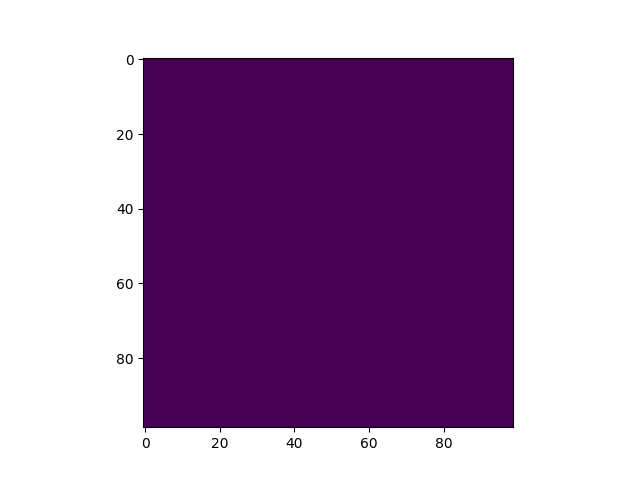

In [10]:
fig,ax,controls = ims.slider(data)

In [16]:
my_dose_array = pickle.load(open('dose_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

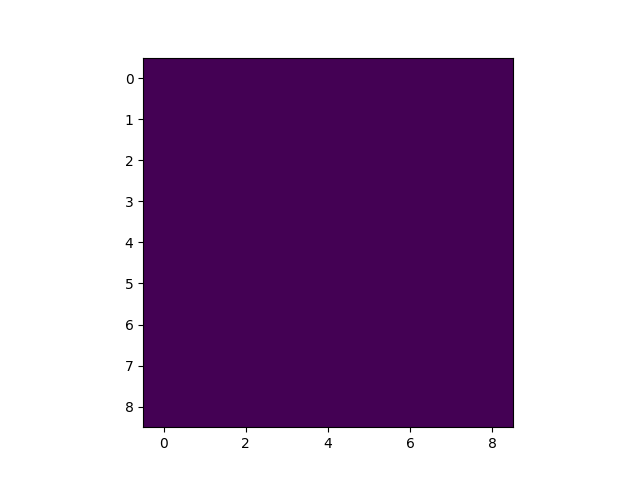

In [7]:
fig,ax,controls = ims.slider(dose,vmin=7.e8)

In [9]:
print(sum(my_dose_array)*1.602e-10,sum(mc_dose_array))

0.03631941168294036 0.0009266880412018293


### Tests for Superposition

In [2]:
test_kernel = array([[[0,0,0],[0,0.1,0],[0,0,0]],
                     [[0,0.1,0],[0.1,0.4,0.1],[0,0.1,0]],
                     [[0,0,0],[0,0.1,0],[0,0,0]]])

In [3]:
test_array_1 = array([[[1,1],[1,1]],
                      [[1,1],[1,1]]])

test_array_2 = array([[[1,1],[0,0]],
                      [[0,0],[0,0]]])

In [4]:
test_array = test_array_2

voxel_info_1 = []
n=0
for x in range(len(test_array)):
    for y in range(len(test_array[0])):
        for z in range(len(test_array[0][0])):
            voxel_info_1.append({})
            voxel_info_1[n]['indices'] = (x+1,y+1,z+1)
            voxel_info_1[n]['TERMA'] = test_array[x][y][z]
            voxel_info_1[n]['d'] = 0.1
            n += 1

voxel_info_1

[{'indices': (1, 1, 1), 'TERMA': 1, 'd': 0.1},
 {'indices': (1, 1, 2), 'TERMA': 1, 'd': 0.1},
 {'indices': (1, 2, 1), 'TERMA': 0, 'd': 0.1},
 {'indices': (1, 2, 2), 'TERMA': 0, 'd': 0.1},
 {'indices': (2, 1, 1), 'TERMA': 0, 'd': 0.1},
 {'indices': (2, 1, 2), 'TERMA': 0, 'd': 0.1},
 {'indices': (2, 2, 1), 'TERMA': 0, 'd': 0.1},
 {'indices': (2, 2, 2), 'TERMA': 0, 'd': 0.1}]

In [5]:
sd.Superposition(test_kernel,(3,3,3),(3,3,3),(0.75,0.75,0.75),[voxel_info_1])
# sd.Superposition?

array([[[0.50758621, 0.50758621],
        [0.20965517, 0.20965517]],

       [[0.20965517, 0.20965517],
        [0.07310345, 0.07310345]]])

In [3]:
%%time
n = 1000
lst = []

for x in range(n):
    for y in range(n):
        for z in range(n):
            # lst.append((x,y,z))
            a = 1

CPU times: user 59.2 s, sys: 4.99 ms, total: 59.2 s
Wall time: 59.3 s
